# **About Dataset**
The SMS Spam Collection is a set of SMS messages that have been collected and labeled as either spam or not spam. This dataset contains 5574 English, real, and non-encoded messages. The SMS messages are thought-provoking and eye-catching. The dataset is useful for mobile phone spam research.

# **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Observing the dataset**

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: label, Length: 5574, dtype: int64

In [9]:
df['text_length'] = df['sms'].apply(lambda x: len(x.split()))

# **Visualization**

In [10]:
plt.figure(figsize=(15,10),dpi=300)

<Figure size 4500x3000 with 0 Axes>

<Figure size 4500x3000 with 0 Axes>

## **Count Plot and Box Plot**









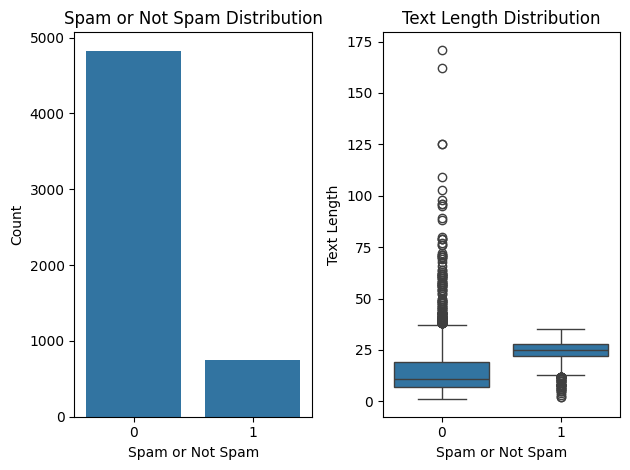

In [11]:
plt.subplot(1,2,1)
# Count Plot
sns.countplot(x='label',data=df)
plt.title('Spam or Not Spam Distribution')
plt.xlabel('Spam or Not Spam')
plt.ylabel('Count')
# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='label', y ='text_length', data=df)
plt.title('Text Length Distribution')
plt.xlabel('Spam or Not Spam')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

## **Text Length Distribution using Histplot**

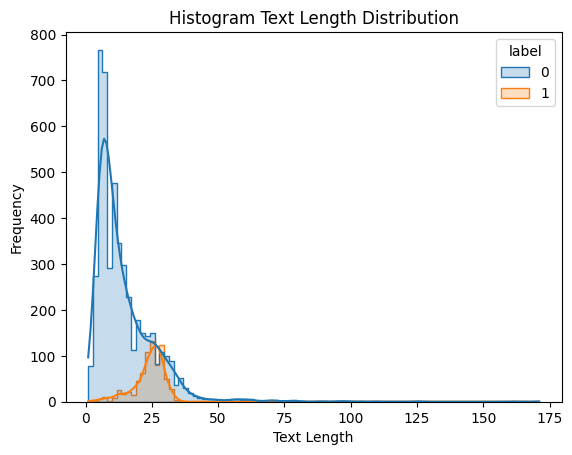

In [12]:
sns.histplot(data=df,x = 'text_length', hue='label', kde= True,element='step')
plt.title('Histogram Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## **Word Cloud for Spam and Ham**



In [13]:
ham_text = " ".join(df[df['label'] == 0]['sms'])
spam_text = " ".join(df[df['label'] == 1]['sms'])

In [14]:
ham_wordcloud = WordCloud(width=800, height = 800 , background_color='pink').generate(ham_text)
spam_wordcloud = WordCloud(width = 800,height = 800, background_color = 'pink').generate(spam_text)

In [15]:
ham_image = ham_wordcloud.to_array()
spam_image = spam_wordcloud.to_array()

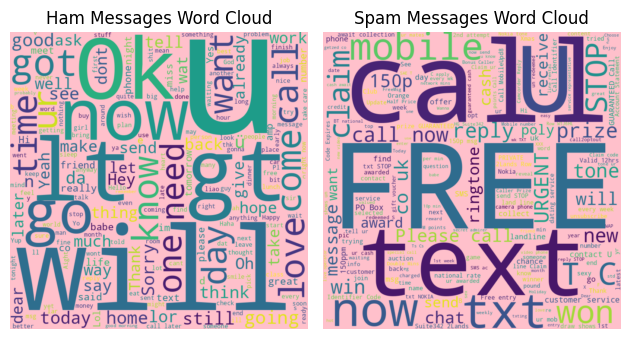

In [16]:
plt.subplot(1,2,1)
plt.imshow(ham_image,interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(spam_image,interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.tight_layout()




array([[[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]],

       [[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]],

       [[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]],

       ...,

       [[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]],

       [[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]],

       [[255, 192, 203],
        [255, 192, 203],
        [255, 192, 203],
        ...,
        [255, 192, 203],
        [255, 192, 203],
        [255, 192, 203]]], dtype=uint8)
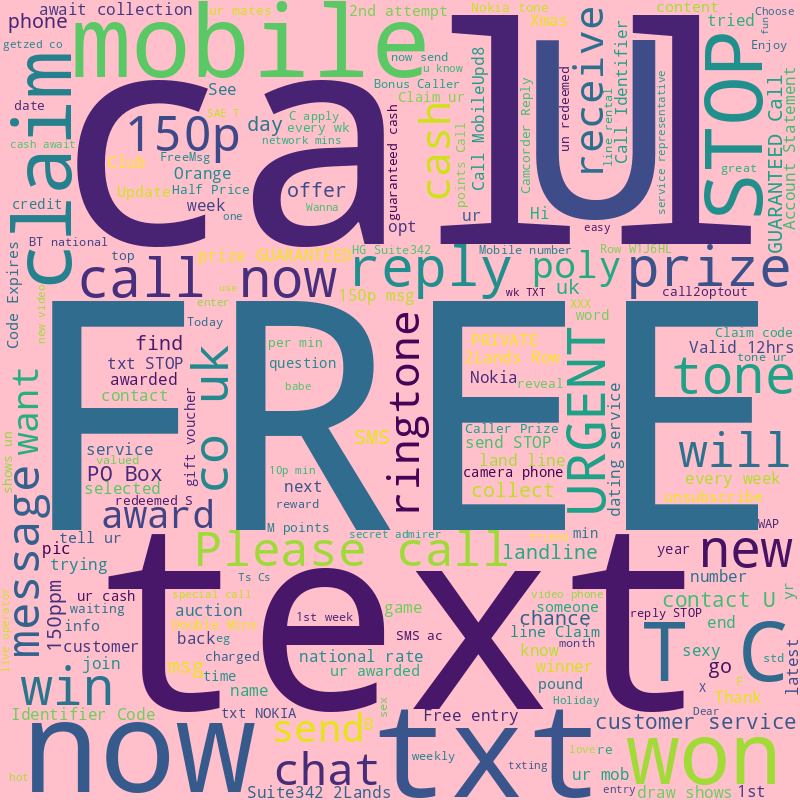

In [17]:
spam_image

## **Distribution Plot**


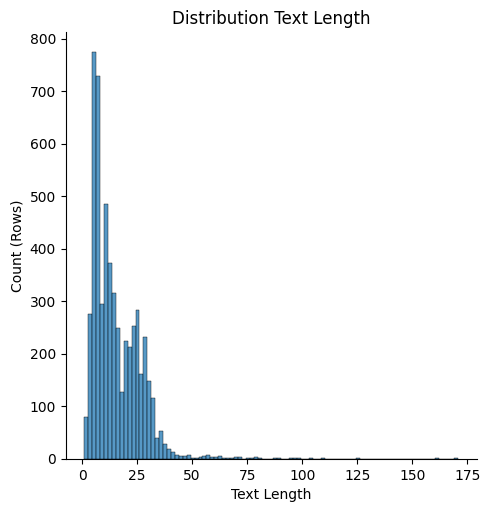

In [18]:
# Distribution Plot
sns.displot(data=df, x='text_length')
plt.title('Distribution Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count (Rows)')
plt.show()

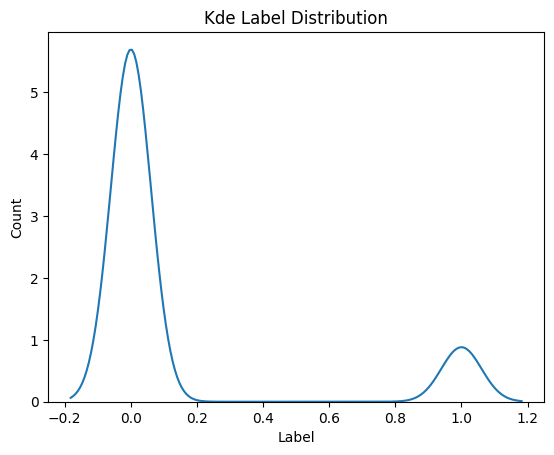

In [19]:
sns.kdeplot(data=df, x="label")
plt.title('Kde Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

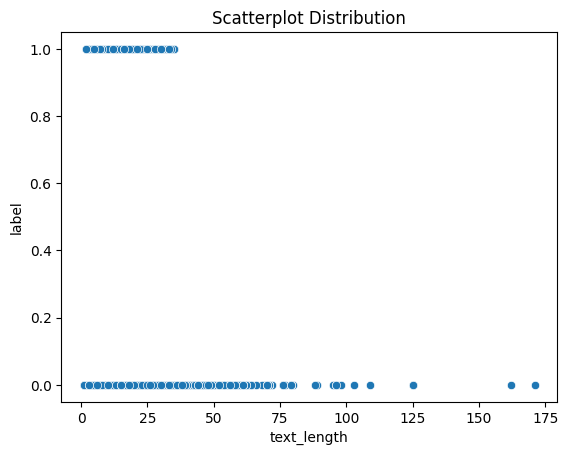

In [20]:
sns.scatterplot(data=df, x="text_length", y="label")
plt.title("Scatterplot Distribution")
plt.xlabel("text_length")
plt.ylabel("label")
plt.show()

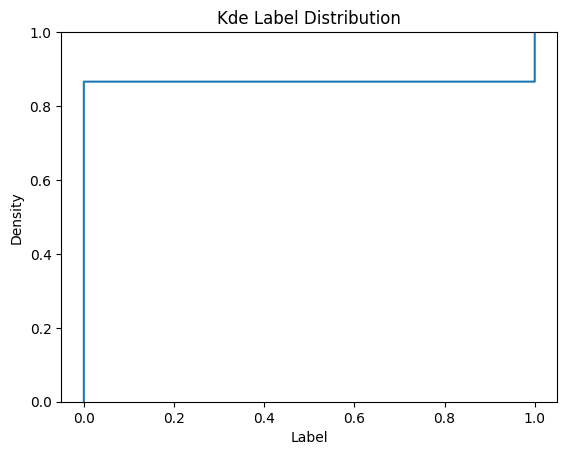

In [21]:
sns.ecdfplot(data=df, x="label")
plt.title('Kde Label Distribution')
plt.xlabel('Label')
plt.ylabel('Density')
plt.show()

# **Preprocessing**

* **Tokenization:** We will split each of the sentence into indivisual tokens. We are gonna make the split based to certain stop words such as spaces and punctuation marks.

* **Lowercasing:** All the words are converted to lower case.

* **Stopword Removal:** We eliminate common words that do not contribute anything.

In [22]:
df.head()

,sms,label,text_length
0,"Go until jurong point, crazy.. Available only ...",0,20
1,Ok lar... Joking wif u oni...\n,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,U dun say so early hor... U c already then say...,0,11
4,"Nah I don't think he goes to usf, he lives aro...",0,13


In [23]:
def preprocessing_helper_function(sms):
  words = word_tokenize(sms) # tokenization
  words = [word.lower() for word in words if word.isalnum()] # Lowercasing
  words = [word for word in words if word not in stopwords.words('english')] # Removing Stopwords
  return " ".join(words)



In [24]:
#words = [word.lower() for word in words if word.isalnum()]
#for word in words:
 # if word.isalnum():
   #return word.lower()

In [25]:
#words = [word for word in words if word not in stopwords.words('english')]
#for word in words:
 # if word not in stopwords.words("english"):
   # return word()


In [26]:
df['sms'] = df['sms'].apply(preprocessing_helper_function)

# Tfidf ( Term Frequency Inverse Document Frequency) Vectorization

In [41]:
tfidf = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
X = tfidf.fit_transform(df['sms']).toarray() # Numpy
y = df['label']

# **Data Splitting**
Now that we have a preprocessed dataset for our feature that is `sms` and label `label`, now we can move on to training our model. But first we need a way to evaluate the performance of our model. So we will split the X and y further into training and test subsets. `test_size`

In [28]:
x_train , x_test, y_train , y_test = train_test_split(X , y, test_size=0.20)

# **Model Training**

Model has three names
* Model
* Classifer
* Estimator

In [29]:
model = MultinomialNB(alpha=.1,force_alpha=True)
model.fit(x_train,y_train)

MultinomialNB(alpha=0.1, force_alpha=True)

###Optional but important to know

The part where we actually use our model to make predictions on real dta or outside data is called model inference.

In [31]:
nltk_classifier = SklearnNLTKClassifier(model)


# **Evaluation**

In [32]:
y_pred = nltk_classifier.classify_many(x_test)

In [36]:
pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       967
           1       0.98      0.91      0.94       148

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       967
           1       0.98      0.91      0.94       148

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [34]:
con = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'True Label')

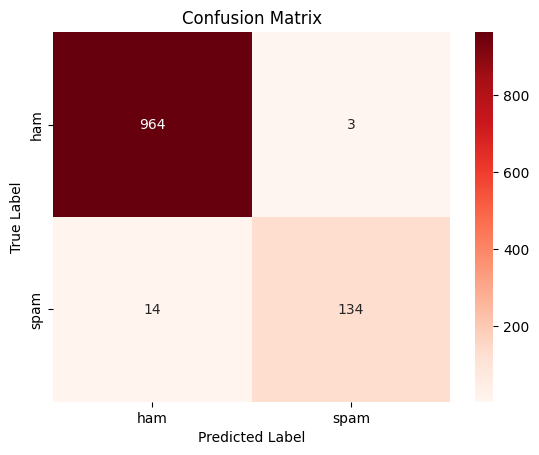

In [35]:
sns.heatmap(con,annot=True,fmt='d',cmap='Reds', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


###Actual Prediction method

In [42]:
class SklearnNLTKClassifier(nltk.classify.ClassifierI):
  def __init__(self,classifier):
    self._classifier = classifier

  def classify(self, features):
    return self._classifier.predict([features])[0] # inference

  def classify_many(self,featuresset):
    return self._classifier.predict(featuresset) # For test dataset

  def prob_classify(self,features)  :
    raise NotImplementedError("Theres an error!") # For something that is impossible to classify

  def labels(self):
    return self.classifier.classes_   # Get the name of our labels



